# Introduction to [`pandas`](http://pandas.pydata.org/) and statistical analysis with Python

`pandas` is part of the constantly growing scientific environment of python. We have already learnt the basics of python, jupyter (and Ipython). `pandas` does not implement significant modeling functionality outside of linear and panel regression; for this, look to [`statsmodels`](http://statsmodels.sourceforge.net/) and [`scikit-learn`](http://scikit-learn.org/stable/). At the following class we will briefly introduce some models from `sckitlearn` and  explore some basic network analysis and visualization with [`networkx`](https://networkx.github.io/). 


<div class="frontmatter text-center">
<img src="scientific_python.jpg" width="800px"/>
</div>

`pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R. Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate. 

For us the main advantages:


- fast and efficient DataFrame object for data manipulation with integrated indexing;
- easy to use tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- flexible reshaping and pivoting of data sets;
- intelligent label-based slicing, fancy indexing, and subsetting of large data sets;- 
- columns can be inserted and deleted from data structures for size mutability;
- aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- high performance merging and joining of data sets;
- hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- attractive statistical graphics from DataFrames with [seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

## So let's get started

Firs we need to learn what is `numpy`. The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

[A notebook](http://ipython.org/notebook.html) and a detailed lecture about `numpy` is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

In this class we do not get deep in `numpy`, but it is important to know that `pandas` is built on `numpy`, so even if we do not notice we will use its functionailites which knowledge can be very useful later (big data analytics, parallel computing).

To start pandas by default we import the following packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


/home/orsi/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Data structures

In [3]:
#Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
#Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates, type(dates)

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 pandas.tseries.index.DatetimeIndex)

In [9]:
#DataFrame is the perfect structure for social scientist raised by SPSS, stata and R
#We can see what it is in our dataset \o/
# It does a lot of handy tricks, which makes data preparation easier
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

A         B         C         D
2013-01-01  1.193272 -0.056780  0.586654  0.873641
2013-01-02  1.368930 -0.080684  0.588368 -0.419560
2013-01-03 -0.983521  1.491627  0.681266 -0.203079
2013-01-04  1.599315  0.210362  1.653795  2.503626
2013-01-05  0.442363  1.143091 -1.181636 -0.546467
2013-01-06  1.409320 -0.265653  0.493522 -1.121001

In [4]:
#It works with many different datatypes
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [5]:
#We can check what kind of data types we have
print df2.dtypes 
print '\n'
#For  given column as well
print 'type of column A: '+str(df2.A.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


type of column A: float64


If you type df2. and push `<TAB>` jupyter shows you all the possibilities what you can do with your dataframe. Try it! DO you remember how to look for help?


In [20]:
df2.copy?

In [25]:
#See the top & bottom rows of the frame
df.head()

A         B         C         D
2013-01-01  1.193272 -0.056780  0.586654  0.873641
2013-01-02  1.368930 -0.080684  0.588368 -0.419560
2013-01-03 -0.983521  1.491627  0.681266 -0.203079
2013-01-04  1.599315  0.210362  1.653795  2.503626
2013-01-05  0.442363  1.143091 -1.181636 -0.546467

In [24]:
df.tail()

A         B         C         D
2013-01-02  1.368930 -0.080684  0.588368 -0.419560
2013-01-03 -0.983521  1.491627  0.681266 -0.203079
2013-01-04  1.599315  0.210362  1.653795  2.503626
2013-01-05  0.442363  1.143091 -1.181636 -0.546467
2013-01-06  1.409320 -0.265653  0.493522 -1.121001

In [26]:
df.index, df.columns, df.values

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index([u'A', u'B', u'C', u'D'], dtype='object'),
 array([[ 1.19327239, -0.05677976,  0.58665369,  0.87364085],
        [ 1.36893023, -0.08068376,  0.58836825, -0.41956015],
        [-0.9835211 ,  1.4916275 ,  0.68126632, -0.20307946],
        [ 1.5993148 ,  0.21036195,  1.65379509,  2.50362647],
        [ 0.44236326,  1.14309105, -1.18163631, -0.54646746],
        [ 1.40931979, -0.26565308,  0.49352241, -1.12100117]]))

In [27]:
#Very usefull function to see what it is in our dataset:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.838280  0.406994  0.470328  0.181193
std    0.978630  0.729699  0.916742  1.312018
min   -0.983521 -0.265653 -1.181636 -1.121001
25%    0.630091 -0.074708  0.516805 -0.514741
50%    1.281101  0.076791  0.587511 -0.311320
75%    1.399222  0.909909  0.658042  0.604461
max    1.599315  1.491627  1.653795  2.503626

In [28]:
#Transpose
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    1.193272    1.368930   -0.983521    1.599315    0.442363    1.409320
B   -0.056780   -0.080684    1.491627    0.210362    1.143091   -0.265653
C    0.586654    0.588368    0.681266    1.653795   -1.181636    0.493522
D    0.873641   -0.419560   -0.203079    2.503626   -0.546467   -1.121001

In [29]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01  0.873641  0.586654 -0.056780  1.193272
2013-01-02 -0.419560  0.588368 -0.080684  1.368930
2013-01-03 -0.203079  0.681266  1.491627 -0.983521
2013-01-04  2.503626  1.653795  0.210362  1.599315
2013-01-05 -0.546467 -1.181636  1.143091  0.442363
2013-01-06 -1.121001  0.493522 -0.265653  1.409320

### Great we had  a look at the very basics of DataFrames and pandas. Now we should explore it deeper with real data.

## Exercise
* Read the two JSON files from the previous class (clinton, trump)
* Use the mentioned_ser dunction from last class and create a dataframe, where indexes are the mentioned users and there are two more columns: mentions_by_clinton, mentions_by_trump
* Plot the frequencies of user mentions by candidate, and also those who have been mentioned by both candidates

In [3]:
import json
json1_file = open('clinton_tweets.txt')
json1_str = json1_file.read()
json1_data = json.loads(json1_str)

In [24]:
json1_data[0].keys()

[u'contributors',
 u'truncated',
 u'text',
 u'is_quote_status',
 u'in_reply_to_status_id',
 u'id',
 u'favorite_count',
 u'source',
 u'retweeted',
 u'coordinates',
 u'entities',
 u'in_reply_to_screen_name',
 u'id_str',
 u'retweet_count',
 u'in_reply_to_user_id',
 u'favorited',
 u'retweeted_status',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'possibly_sensitive',
 u'lang',
 u'created_at',
 u'in_reply_to_status_id_str',
 u'place',
 u'metadata']

In [25]:
def find_mentioned_users(data):
    screen_names=[user_mention['screen_name'] 
                 for status in data
                     for user_mention in status['entities']['user_mentions'] ]
    return screen_names

In [27]:
from collections import Counter

In [34]:
d=dict(Counter(find_mentioned_users(json1_data)))

In [73]:
Clinton=pd.DataFrame.from_dict(d, orient='index')

In [88]:
Clinton.columns=['clinton']

In [89]:
Clinton.head()

clinton
Ricky_Vaughn99        64
DennisPrager          32
Sarah__Reynolds       32
ThankYouBernie        32
HillaryClinton        64

In [76]:
def user_mentions_df(file):
    json1_file = open(file)
    json1_str = json1_file.read()
    json1_data = json.loads(json1_str)
    d=dict(Counter(find_mentioned_users(json1_data)))
    return pd.DataFrame.from_dict(d, orient='index')

In [77]:
Trump=user_mentions_df('trump_tweets.txt')

In [86]:
Trump.columns=['trump']

In [87]:
Trump.head()

trump
Damienfaitlcon     32
FoxNews            32
EricIdle           32
HFA                32
anjemchoudary      32

### Let's join them! Check out [this](http://pandas.pydata.org/pandas-docs/stable/merging.html)!

In [91]:
mentioned_users=pd.concat([Trump, Clinton], axis=1)

In [92]:
mentioned_users['both']=mentioned_users.trump+mentioned_users.clinton

In [93]:
mentioned_users

trump  clinton   both
2ALAW              NaN     32.0    NaN
2ser              32.0      NaN    NaN
AP                 NaN     32.0    NaN
ASerignese         NaN     32.0    NaN
ATLBlackStar      32.0      NaN    NaN
AlanKestrel750    32.0      NaN    NaN
AliceOllstein      NaN     64.0    NaN
AlterNet          32.0      NaN    NaN
AlysiaStern       32.0      NaN    NaN
AmyMek             NaN     32.0    NaN
AndrewKirell      32.0      NaN    NaN
AnnCoulter        32.0      NaN    NaN
AnneBayefsky       NaN     32.0    NaN
BenHowe           32.0      NaN    NaN
BernaMeaden       32.0      NaN    NaN
BreitbartNews      NaN     32.0    NaN
CNN                NaN    160.0    NaN
CNNPolitics       32.0     64.0   96.0
Cernovich          NaN     32.0    NaN
CulturalCombat     NaN     32.0    NaN
Damienfaitlcon    32.0      NaN    NaN
DanScavino        32.0      NaN    NaN
DebAlwaystrump     NaN     64.0    NaN
DebiDkruse         NaN     32.0    NaN
DennisPrager       NaN     32.0    NaN
DrJillStein        NaN     64.0    NaN
EricIdle          32.0      NaN    NaN
FBI                NaN     64.0    NaN
FiveRights        32.0      NaN    NaN
FoxNews           32.0      NaN    NaN
...                ...      ...    ...
joejones1954      32.0     32.0   64.0
jturnershow        NaN     64.0    NaN
justin_halpern    32.0      NaN    NaN
katprescott77     32.0      NaN    NaN
maggotmagnet       NaN     32.0    NaN
mashable           NaN     32.0    NaN
mch7576           32.0      NaN    NaN
mckinnon_a        32.0      NaN    NaN
meganamram        32.0      NaN    NaN
mterr337           NaN     64.0    NaN
mtracey           32.0      NaN    NaN
npomalley         32.0      NaN    NaN
nuiotwo            NaN    160.0    NaN
olliepopkin        NaN     32.0    NaN
orphansliberty     NaN     32.0    NaN
realDonaldTrump  128.0     64.0  192.0
relisberg         32.0      NaN    NaN
sakirkhader      288.0      NaN    NaN
shannonjpower     32.0      NaN    NaN
slava381977       32.0      NaN    NaN
standardnews      32.0     32.0   64.0
sweetatertot2      NaN     32.0    NaN
twitter           32.0      NaN    NaN
vonzion            NaN     32.0    NaN
washingtonpost     NaN     32.0    NaN
wikileaks          NaN     32.0    NaN
wordpressdotcom   32.0      NaN    NaN
xoSheri           32.0      NaN    NaN
yazbitsin         32.0      NaN    NaN
zesty_politics    32.0     32.0   64.0

[139 rows x 3 columns]

In [113]:
#to have pretty plots install seaborn and import it
import seaborn 

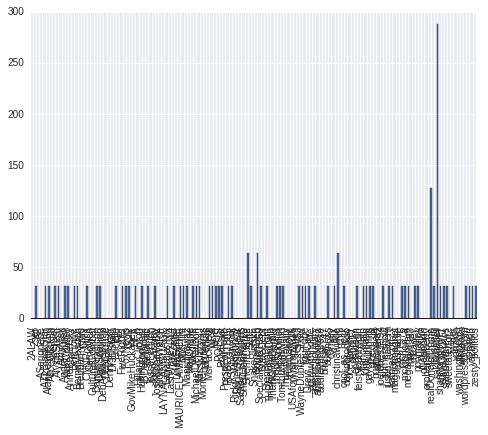

In [106]:
plt.figure()
mentioned_users.trump.plot(kind='bar')
plt.axhline(0, color='k')

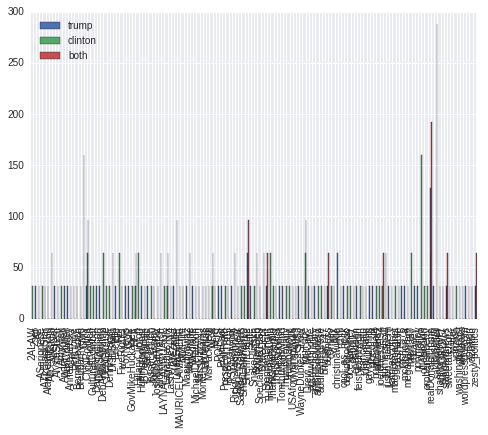

In [107]:
mentioned_users.plot.bar()

## Too much data doen't make any sense, we should sort it and lot only the relevant ones

/home/orsi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


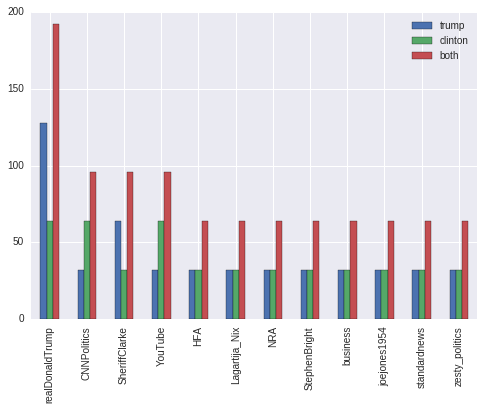

In [112]:
mentioned_users.sort(['both'], ascending=False)[:12].plot.bar()

# Regression Analysis with pandas


## Exercises
Data analysis starts with data preparation and data exploration. Please, go throught the follwing tasks by yourself, before we do some deeper statstics. Do not forget the entire Internet is out there to help you out :)

* Check out before reading the dataset `nintendo.csv` and the `titles.csv` how does it look like, and check out the `READ.me` file for further information what it contains 
* Read into a dataframe the dataset `nintendo.csv`
* Create game based aggreagated dataset, where you have four new variables: the average_team_experience, average_title_change and average_pos_change, the number_of_people and the release year 
* Read into a dataframe the dataset `titles.csv`


hints:
- pd.df.groupby(): group series using mapper (dict or key function, apply given function to group, return result as series) or by a series of columns.
- pd.df.nunique(): return number of unique elements in the object.

In [2]:
!head nintendo.csv

,game_id_x,platform_id_x,title_category,title_category_id,normilized_title_id,normalized_title,developer_id,game_id_str,Label,year,working_index,number_of_projects_been,changing_title,changing_poitions
0,"21,570",9,Other,8,71,Other,"1,019",21570,StarCraft 64,2000.0,85988,0.0,1.0,2.0
1,"21,570",9,Other,8,71,Other,"1,020",21570,StarCraft 64,2000.0,85989,0.0,2.0,3.0
2,"21,570",9,Production,5,56,Executive Producer,"1,020",21570,StarCraft 64,2000.0,85990,0.0,1.0,2.0
3,"21,570",9,Other,8,71,Other,"1,021",21570,StarCraft 64,2000.0,85991,0.0,1.0,2.0
4,"21,570",9,Other,8,71,Other,"1,022",21570,StarCraft 64,2000.0,85992,0.0,1.0,2.0
5,"21,570",9,Design,1,55,Level/Scenario Designer,"1,023",21570,StarCraft 64,2000.0,85993,0.0,2.0,2.0
6,"21,570",9,Other,8,71,Other,"1,023",21570,StarCraft 64,2000.0,85994,0.0,2.0,3.0
7,"21,570",9,Production,5,56,Executive Producer,"1,023",21570,StarCraft 64,2000.0,85995,0.0,1.0,2.0
8,"21,570",9,Art/Graphics,3,10,Artist,"1,026",21570,StarCraft 64,2000.0,85996,0.0,1.0,2

In [2]:
Nintendo=pd.read_csv('nintendo.csv', index_col= 10)

In [3]:
Nintendo.head()

game_id_x  platform_id_x title_category  title_category_id  \
working_index                                                              
85988            21,570              9          Other                  8   
85989            21,570              9          Other                  8   
85990            21,570              9     Production                  5   
85991            21,570              9          Other                  8   
85992            21,570              9          Other                  8   

               normilized_title_id    normalized_title developer_id  \
working_index                                                         
85988                           71               Other        1,019   
85989                           71               Other        1,020   
85990                           56  Executive Producer        1,020   
85991                           71               Other        1,021   
85992                           71               Other        1,022   

               game_id_str         Label    year  number_of_projects_been  \
working_index                                                               
85988                21570  StarCraft 64  2000.0                      0.0   
85989                21570  StarCraft 64  2000.0                      0.0   
85990                21570  StarCraft 64  2000.0                      0.0   
85991                21570  StarCraft 64  2000.0                      0.0   
85992                21570  StarCraft 64  2000.0                      0.0   

               changing_title  changing_poitions  
working_index                                     
85988                     1.0                2.0  
85989                     2.0                3.0  
85990                     1.0                2.0  
85991                     1.0                2.0  
85992                     1.0                2.0

In [4]:
Nintendo.describe()

platform_id_x  title_category_id  normilized_title_id   game_id_str  \
count   28025.000000       28025.000000         28025.000000  28025.000000   
mean       28.014451           7.413809            57.715040  15928.120999   
std        26.780089           6.168170            49.991578  11354.472438   
min         2.000000           1.000000             4.000000    138.000000   
25%        11.000000           3.000000            23.000000   5599.000000   
50%        14.000000           5.000000            47.000000  13261.000000   
75%        44.000000          11.000000            72.000000  25099.000000   
max        82.000000          20.000000           262.000000  42715.000000   

               year  number_of_projects_been  changing_title  \
count  28025.000000             28025.000000    28025.000000   
mean    1995.718644                 5.526780        1.603104   
std      105.571931                13.905481        0.731912   
min        0.000000                 0.000000        0.000000   
25%     1998.000000                 0.000000        1.000000   
50%     2002.000000                 0.000000        1.000000   
75%     2006.000000                 5.000000        2.000000   
max     2009.000000               171.000000        3.000000   

       changing_poitions  
count       28025.000000  
mean            2.522070  
std             0.697621  
min             0.000000  
25%             2.000000  
50%             3.000000  
75%             3.000000  
max             4.000000

In [59]:
Nintendo['game_plat']=(Nintendo['game_id_str'].astype(str))+'@'+(Nintendo['platform_id_x'].astype(str))

In [60]:
grouped_nintendo = Nintendo.groupby(Nintendo['game_plat'])

In [61]:
grouped_nintendo.head()

game_id_x  platform_id_x           title_category  \
working_index                                                     
85988            21,570              9                    Other   
85989            21,570              9                    Other   
85990            21,570              9               Production   
85991            21,570              9                    Other   
85992            21,570              9                    Other   
86063            29,958             82  Programming/Engineering   
8181                138             33             Art/Graphics   
86743            20,629             14  Programming/Engineering   
87082            29,116             82  Programming/Engineering   
87312            41,524             82  Programming/Engineering   
8285              7,783             14                    Other   
3795              6,610             15             Art/Graphics   
10553             3,105              3             Art/Graphics   
10555             3,105              3             Art/Graphics   
10557             3,105              3                   Design   
10559             3,105              3         Video/Cinematics   
10561             3,105              9             Art/Graphics   
10563             3,105              9             Art/Graphics   
10565             3,105              9                   Design   
10567             3,105              9                    Other   
8765                276              3             Art/Graphics   
8768                276              3                   Design   
8771                276              3               Production   
8774                276              8               Production   
8777                276              9             Art/Graphics   
8780                276              9                   Design   
8783                276              9               Production   
8786                276             11             Art/Graphics   
8789                276             11             Art/Graphics   
8792                276             11                   Design   
...                 ...            ...                      ...   
7131                582             27             Art/Graphics   
7132                582             27  Programming/Engineering   
81179             6,176             10                   Design   
126752           42,583             10               Production   
126753           42,583             10               Production   
126754           42,583             10                   Design   
7095                582             60                    Audio   
7137                848             24                    Audio   
6978                273             26                    Audio   
6980                273             27             Art/Graphics   
61711             7,313             22  Programming/Engineering   
61714             7,313             57  Programming/Engineering   
61737             7,765             22  Programming/Engineering   
81445             9,378             27  Programming/Engineering   
61717             7,313             22                   Design   
7918              6,026             10                   Design   
7925              6,026             10                   Design   
7932              6,026             10  Programming/Engineering   
7939              6,026             15                   Design   
7946              6,026             15                   Design   
7953              6,026             15  Programming/Engineering   
7960              6,026             22                   Design   
7967              6,026             22                   Design   
7974              6,026             22  Programming/Engineering   
11560            12,764             15               Production   
8081              7,301             41  Programming/Engineering   
81459            10,806             57  Programming/Engineeri

In [63]:
number_of_dev=pd.DataFrame(grouped_nintendo['developer_id'].nunique())
number_of_dev.columns=['number_of_people']
number_of_dev['game_plat']=number_of_dev.index

In [64]:
average_expr=pd.DataFrame(grouped_nintendo['number_of_projects_been'].mean())
average_expr['game_plat']=average_expr.index

In [65]:
average_title_change=pd.DataFrame(grouped_nintendo['changing_title'].mean())
average_title_change['game_plat']=average_title_change.index

In [66]:
average_pos_change=pd.DataFrame(grouped_nintendo['changing_poitions'].mean())
average_pos_change['game_plat']=average_pos_change.index

In [67]:
year=pd.DataFrame(grouped_nintendo['year'].mean())
year['game_plat']=year.index

In [68]:
groupby_data=pd.merge(number_of_dev, average_expr, on='game_plat', how='outer')

In [69]:
groupby_data=groupby_data.merge(average_title_change, on='game_plat', how='outer')

In [70]:
groupby_data=groupby_data.merge(average_pos_change, on='game_plat', how='outer')

In [71]:
groupby_data=groupby_data.merge(year, on='game_plat', how='outer')

In [72]:
new_index= list(groupby_data['game_plat'])

In [73]:
groupby_data=groupby_data.drop_duplicates()

In [74]:
groupby_data.head()

number_of_people game_plat  number_of_projects_been  changing_title  \
0               109  10019@14                 7.962406        1.646617   
1                12  10072@22                 2.500000        1.416667   
2                 5  10128@26                 1.400000        1.200000   
3                67  10159@14                 6.641791        1.582090   
4                28  10175@12                 9.964286        1.321429   

   changing_poitions    year  
0           2.804511  2003.0  
1           2.416667  1986.0  
2           2.200000  1993.0  
3           2.014925  2003.0  
4           2.285714  2003.0

In [87]:
len(groupby_data)

505

#### Read in the titles csv as well

In [75]:
titles=pd.DataFrame.from_csv('titles.csv')

In [21]:
titles.head()

platform_id               game_title moby_score  \
game_id                                                    
1                  3        X-Files Game, The       3.77   
1                  6        X-Files Game, The       4.26   
1                 74        X-Files Game, The       5.00   
2                  2  Who Framed Roger Rabbit       2.57   
2                 19  Who Framed Roger Rabbit       2.83   

        total_moby_score_votes registered_users_moby_score_votes moby_rank  
game_id                                                                     
1                           28                                22     71.00  
1                            5                                 5      null  
1                            1                                 1      null  
2                           11                                 9      null  
2                            3                                 3     50.00

In [76]:
titles['game_id']=titles.index

In [77]:
titles['game_plat']=(titles['game_id'].astype(str))+'@'+(titles['platform_id'].astype(str))

In [78]:
type(titles['game_plat'][0])

str

In [137]:
d=pd.merge(groupby_data, titles, on='game_plat', how='inner')

In [129]:
d

number_of_people game_plat  number_of_projects_been  changing_title  \
0                  1    138@28                 0.000000        1.000000   
1                  3    138@30                 0.000000        1.000000   
2                  1    138@33                 0.000000        1.000000   
3                 47    138@69                 1.957447        1.829787   
4                  1    139@27                 0.000000        1.000000   
5                  1    139@30                 0.000000        1.000000   
6                  1    139@47                 0.000000        1.000000   
7                 46    139@69                 0.456522        1.413043   
8                 71    273@12                 0.000000        1.366197   
9                 10    273@16                 0.363636        1.181818   
10                 7    273@19                 0.000000        1.250000   
11                 6     273@2                 0.000000        1.857143   
12                 6    273@26                 0.666667        1.000000   
13                 3    273@27                 0.000000        1.000000   
14                 9    273@56                 0.181818        1.090909   
15               110    276@11                 1.874074        1.422222   
16               122     276@3                 0.000000        1.362963   
17               106    276@74                 0.601770        1.203540   
18                32     276@8                 0.000000        1.125000   
19               175     276@9                 0.143646        1.552486   
20                98     338@2                 0.000000        1.452991   
21                80     338@5                 0.020619        1.680412   
22                42     338@6                 0.000000        1.047619   
23                79     338@9                 0.731707        1.463415   
24                86     345@3                 0.572917        1.385417   
25                57     345@9                 1.578947        1.245614   
26                 1    574@27                 0.000000        1.000000   
27                 1    574@28                 0.000000        1.000000   
28                 1    574@31                 0.000000        1.000000   
29                 3    574@39                 0.000000        1.000000   
30                 1    574@43                 0.000000        1.000000   
31                 2    574@47                 0.000000        1.000000   
32                 1    574@62                 0.000000        1.000000   
33                29    582@11                 0.451613        1.677419   
34                 3    582@19                 0.000000        1.000000   
35                 3    582@27                 0.000000        1.250000   
36                 4    582@60                 0.500000        1.000000   
37                16    848@19                 0.000000        1.736842   
38                19     848@2                 0.086957        1.695652   
39                 2    848@24                 1.000000        1.333333   
40                10    848@27                 0.000000        1.857143   
41                 3    848@41                 0.000000        1.000000   
42                 3    848@60                 0.000000        1.000000   

    changing_poitions    year  platform_id                    game_title  \
0            2.000000  1981.0           28                       Pac-Man   
1            2.000000  1981.0           30                       Pac-Man   
2            2.000000  1981.0           33                       Pac-Man   
3            2.744681  1981.0           69                       Pac-Man   
4            1.000000  1982.0           27                       Dig Dug   
5            2.000000  1982.0           30                       Dig Dug   
6            1.000000  1982.0           47                       Dig Dug   
7            2.021739  1982.0           69                       Dig Dug   
8            2.4084

In [138]:
d['moby_score'] = d['moby_score'].apply(float)
d['total_moby_score_votes'] = d['total_moby_score_votes'].apply(float)
d['registered_users_moby_score_votes'] = d['registered_users_moby_score_votes'].apply(float)
d['platform_id']=d['platform_id'].apply(str)

In [139]:
d.describe()

number_of_people  number_of_projects_been  changing_title  \
count         43.000000                43.000000       43.000000   
mean          30.279070                 0.260194        1.243743   
std           42.656617                 0.498860        0.286088   
min            1.000000                 0.000000        1.000000   
25%            2.000000                 0.000000        1.000000   
50%            6.000000                 0.000000        1.125000   
75%           46.500000                 0.407625        1.417633   
max          175.000000                 1.957447        1.857143   

       changing_poitions         year  moby_score  total_moby_score_votes  \
count          43.000000    43.000000   43.000000               43.000000   
mean            2.090760  1665.744186    3.207907               16.046512   
std             0.583338   743.238092    0.827939               20.497333   
min             1.000000     0.000000    0.000000                1.000000   
25%             2.000000  1981.500000    3.000000                4.000000   
50%             2.170732  1989.000000    3.480000                7.000000   
75%             2.558442  1992.500000    3.715000               16.500000   
max             2.857143  1999.000000    4.220000              102.000000   

       registered_users_moby_score_votes  
count                          43.000000  
mean                           14.465116  
std                            16.865503  
min                             1.000000  
25%                             4.000000  
50%                             6.000000  
75%                            16.500000  
max                            75.000000

We ended up with 42 games

In [110]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [140]:
d.corr(method='pearson', min_periods=1)

number_of_people  number_of_projects_been  \
number_of_people                           1.000000                 0.331244   
number_of_projects_been                    0.331244                 1.000000   
changing_title                             0.445584                 0.304131   
changing_poitions                          0.508201                 0.355016   
year                                       0.306944                 0.234089   
moby_score                                 0.127522                 0.013653   
total_moby_score_votes                     0.325752                -0.122252   
registered_users_moby_score_votes          0.325935                -0.123475   

                                   changing_title  changing_poitions  \
number_of_people                         0.445584           0.508201   
number_of_projects_been                  0.304131           0.355016   
changing_title                           1.000000           0.658102   
changing_poitions                        0.658102           1.000000   
year                                     0.381697           0.655032   
moby_score                               0.139968           0.035532   
total_moby_score_votes                   0.361800           0.445327   
registered_users_moby_score_votes        0.344492           0.448579   

                                       year  moby_score  \
number_of_people                   0.306944    0.127522   
number_of_projects_been            0.234089    0.013653   
changing_title                     0.381697    0.139968   
changing_poitions                  0.655032    0.035532   
year                               1.000000   -0.050286   
moby_score                        -0.050286    1.000000   
total_moby_score_votes             0.223846    0.376611   
registered_users_moby_score_votes  0.233516    0.396732   

                                   total_moby_score_votes  \
number_of_people                                 0.325752   
number_of_projects_been                         -0.122252   
changing_title                                   0.361800   
changing_poitions                                0.445327   
year                                             0.223846   
moby_score                                       0.376611   
total_moby_score_votes                           1.000000   
registered_users_moby_score_votes                0.985658   

                                   registered_users_moby_score_votes  
number_of_people                                            0.325935  
number_of_projects_been                                    -0.123475  
changing_title                                              0.344492  
changing_poitions                                           0.448579  
year                                                        0.233516  
moby_score                                                  0.396732  
total_moby_score_votes                                      0.985658  
registered_users_moby_score_votes                           1.000000

In [148]:
import statsmodels.formula.api as smf
formula ='total_moby_score_votes ~ changing_poitions+number_of_projects_been'
result = smf.ols(formula, data=d ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_moby_score_votes   R-squared:                       0.288
Model:                                OLS   Adj. R-squared:                  0.253
Method:                     Least Squares   F-statistic:                     8.100
Date:                    Mon, 22 Aug 2016   Prob (F-statistic):            0.00111
Time:                            13:20:56   Log-Likelihood:                -183.07
No. Observations:                      43   AIC:                             372.1
Df Residuals:                          40   BIC:                             377.4
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 -21.6064     10.400     -2.078      0.044       -42.626    -0.587
changing_poitions          19.6495      5.014      3.919      0.000         9.516    29.783
number_of_projects_been   -13.1803      5.863     -2.248      0.030       -25.030    -1.331
==============================================================================
Omnibus:                       30.751   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.279
Skew:                           1.880   Prob(JB):                     2.02e-16
Kurtosis:                       8.119   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

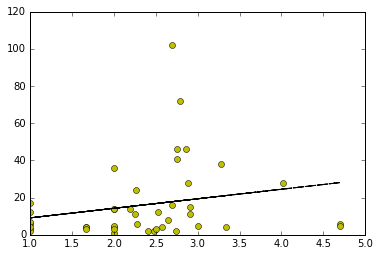

In [149]:
x=d.changing_poitions+d.number_of_projects_been
y=d.total_moby_score_votes

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

### Ok this dataset is not the best for regressions, let's use something more relevant

In sociology and social sciences we have a crazy amount of `sav` files by IBM Statistics, `stata` and `R` dataframes. R mainly handles csv-s as well, but with `rpy2` module Python and R can communicate easily. 
Pandas handles many file formats, including `csv`, `json`, `sql` and `stata`, but not `sav`.

        read_csv
        read_excel
        read_hdf
        read_sql
        read_json
        read_msgpack (experimental)
        read_html
        read_gbq (experimental)
        read_stata
        read_sas
        read_clipboard
        read_pickle

For IBM Statistics `sav` files we need an external module [`savReaderWriter`](http://pythonhosted.org/savReaderWriter/). 

In [158]:
! pip install savReaderWriter

    100% |████████████████████████████████| 50.9MB 3.3kB/s 
  Running setup.py bdist_wheel for savReaderWriter ... - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /home/orsi/.cache/pip/wheels/ee/9f/ef/b1f514616baa419d597030dd91c2bedfe53c9c5f529b044957
Successfully built savReaderWriter


In [1]:
import savReaderWriter

In [13]:
with savReaderWriter.SavReader('ESS7e02.spss/ESS7e02.sav') as reader:
    header = reader.header
    #print header
    records = reader.all()

In [19]:
ESS=pd.DataFrame(records, columns=header)

In [20]:
ESS.head()

name  essround edition    proddate  idno cntry  tvtot  tvpol  ppltrst  \
0  ESS7e02       7.0     2.0  26.05.2016   1.0    AT    4.0    1.0      7.0   
1  ESS7e02       7.0     2.0  26.05.2016   2.0    AT    7.0    3.0      5.0   
2  ESS7e02       7.0     2.0  26.05.2016   3.0    AT    6.0    2.0      6.0   
3  ESS7e02       7.0     2.0  26.05.2016   4.0    AT    3.0    1.0      5.0   
4  ESS7e02       7.0     2.0  26.05.2016   5.0    AT    2.0    2.0      3.0   

   pplfair    ...     inwtm  spltadmf  supqad1  supqad2  supqdd  supqmm  \
0      7.0    ...      49.0       1.0      6.0      1.0    24.0     3.0   
1      5.0    ...      67.0       1.0      6.0      1.0    26.0     3.0   
2      8.0    ...      58.0       2.0      6.0      1.0    26.0     3.0   
3      3.0    ...      43.0       1.0      6.0      1.0    24.0     3.0   
4      7.0    ...      54.0       2.0      6.0      1.0    24.0     3.0   

   supqyr   dweight   pspwght   pweight  
0  2015.0  0.938075  1.027638  0.406019  
1  2015.0  0.938075  1.017542  0.406019  
2  2015.0  0.938075  1.631601  0.406019  
3  2015.0  0.938075  1.333318  0.406019  
4  2015.0  0.938075  0.638633  0.406019  

[5 rows x 601 columns]

## Group Exercise

Time for data exploration before we start data analysis in groups. Each group has 30 minutes to create one plot and present their workflow and results in front of the class in 5 minutes, including the code (emphasizing new functions of pandas they explored)


### TOPICS

1. Political differences between countraies:
        Create a plot by countries regarding how is the left-right spectrum is in the country. 
        use: cntry, lrsscale, (extra variables: agea, gndr)

2. Voting behavior by countries:
         Create a plot, to show how many percent went to vote at the last elections by countries.
         use: cntry, vote, gndr, agea

3. Trust in Hungary:

        Compare Hungarians by gender,age and the size of residence (regunit) regarding how much they trust people.
        use: ppltrst, pplfair, pplhlp, agea, gndr, regunit

4. Attitdes towards migrants in Hungary, Germany and a country of yur choice:
        Compare on a plot, how xenofobic these three countries in total and by questions
        use:(Questionaire D7-D9) imtcjob, imbleco, imwbcr

### Instructions:
* In order to present results, create new cathegorical (ordinal) variables if needed (eg.: age groups, left/right..etc)
* Use your sociological and statistical knowledge, be creative and add other variables if you want. (Please, find the questionaire at the class folder `ESS7_source_main_questionnaire.pdf`)
* Each plot must have title, labels (x,y), legend
* Think about which plot is the best to show the results (histogram, bar, line...etc)
* Before plotting, check out the descriptive statistics (hint: NaN~np.nan, outliers)

Use Google/Stackoverflow or ask me if you have any question!